In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

Theo như kết quả từ việc phân tích các feature đã làm trước đó, nhóm đã rút ra được 10 features có ảnh hưởng đến khả năng dự đoán của mô hình. Từ bộ dữ liệu ban đầu, nhóm đã rút các features không cần thiết để tạo nên bộ dữ liệu chỉ chứa các features cần thiết để tạo nên một mô hình scorecard để phục vụ cho việc xét duyệt khoản vay

In [2]:
data = pd.read_csv("./cleaned_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   20000 non-null  int64  
 1   label                         20000 non-null  int64  
 2   NUMBER_OF_LOANS               20000 non-null  float64
 3   NUMBER_OF_RELATIONSHIP_BANK   20000 non-null  float64
 4   NUM_NEW_LOAN_TAKEN_12M        20000 non-null  float64
 5   NUM_NEW_LOAN_TAKEN_BANK_12M   20000 non-null  float64
 6   OUTSTANDING_BAL_LOAN_CURRENT  20000 non-null  float64
 7   OUTSTANDING_BAL_LOAN_6M       20000 non-null  float64
 8   OUTSTANDING_BAL_ALL_3M        20000 non-null  float64
 9   OUTSTANDING_BAL_ALL_3M_6M     20000 non-null  float64
 10  ENQUIRIES_FROM_NON_BANK_3M    20000 non-null  float64
 11  ENQUIRIES_FROM_BANK_3M_6M     20000 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 1.8 MB


In [4]:
data.head(10)

,customer_id,label,NUMBER_OF_LOANS,NUMBER_OF_RELATIONSHIP_BANK,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_3M_6M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FROM_BANK_3M_6M
0,1639,1,1.00,1.00,1.00,1.00,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00",7.00,-3.00
1,23717,0,10.00,13.00,13.00,13.00,"1,000,250.00","1,000,165.00","1,000,433.33","1,000,013.54",12.00,-3.00
2,19474,0,13.00,16.00,13.00,13.00,"1,000,360.00","1,000,323.33","1,000,606.67","1,000,011.63",12.00,7.00
3,15505,0,7.00,7.00,4.00,4.00,"1,000,040.00","1,000,040.00","1,000,096.67","1,000,009.83",7.00,4.22
4,1538,1,8.42,1.00,4.00,4.00,"1,000,200.00","1,000,141.67","1,000,792.30","1,000,012.61",7.00,2.00
5,8455,0,4.00,7.00,4.00,4.00,"1,000,100.00","1,000,016.67","1,000,036.67","1,000,016.92",7.00,-3.00
6,20339,0,13.00,16.00,7.00,7.00,"1,001,670.00","1,001,286.67","1,001,433.33","1,000,007.74",7.00,3.11
7,6629,0,19.00,7.00,22.00,22.00,"1,000,450.00","1,000,253.33","1,000,246.67","1,000,009.74",12.00,-3.00
8,9850,0,7.00,4.00,7.00,7.00,"1,000,290.00","1,000,075.00","1,000,166.67","1,000,018.52",7.00,-3.00
9,22474,0,10.00,7.00,10.00,10.00,"1,000,260.00","1,000,131.67","1,000,170.00","1,000,011.59",12.00,-3.00


In [5]:
data.describe()

,customer_id,label,NUMBER_OF_LOANS,NUMBER_OF_RELATIONSHIP_BANK,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_3M_6M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FROM_BANK_3M_6M
count,"20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00"
mean,"12,805.81",0.18,8.42,6.89,7.36,7.36,"1,000,703.40","1,000,611.82","1,000,792.30","1,000,010.88",9.98,0.50
std,"7,405.23",0.39,4.65,6.31,4.53,4.53,"3,738.55","3,352.30","3,231.56",4.48,4.55,3.92
min,0.00,0.00,1.00,1.00,1.00,1.00,"1,000,000.00","999,588.33","1,000,000.00","999,990.00",2.00,-3.00
25%,"6,374.75",0.00,4.00,4.00,4.00,4.00,"1,000,070.00","1,000,043.33","1,000,073.33","1,000,009.15",7.00,-3.00
50%,"12,840.50",0.00,7.00,4.00,7.00,7.00,"1,000,190.00","1,000,130.00","1,000,240.00","1,000,010.74",7.00,-3.00
75%,"19,206.25",0.00,10.00,10.00,10.00,10.00,"1,000,480.00","1,000,420.00","1,000,713.33","1,000,012.50",12.00,3.16
max,"25,659.00",1.00,34.00,61.00,76.00,76.00,"1,169,190.00","1,150,055.00","1,150,050.00","1,000,020.00",67.00,7.00


In [6]:
label_0=data[data["label"]==0]
label_1=data[data["label"]==1]
n=len(label_0)/len(data["label"])
n_1=len(label_1)/len(data["label"])
print(f"Số khách hàng trả nợ đúng hạn {len(label_0)}")
print(f"Số khách hàng quá hạn trả nợ {len(label_1)}")
print(f"Tỷ lệ số khách hàng trả nợ đúng hạn trên tổng số khách hàng: {n}")
print(f"Tỷ lệ số khách hàng quá hạn trả nợ trên tổng số khách hàng: {n_1}")

Số khách hàng trả nợ đúng hạn 16356
Số khách hàng quá hạn trả nợ 3644
Tỷ lệ số khách hàng trả nợ đúng hạn trên tổng số khách hàng: 0.8178
Tỷ lệ số khách hàng quá hạn trả nợ trên tổng số khách hàng: 0.1822


## Huấn luyện mô hình

**Phân tích độ tương quan giữa các biến**

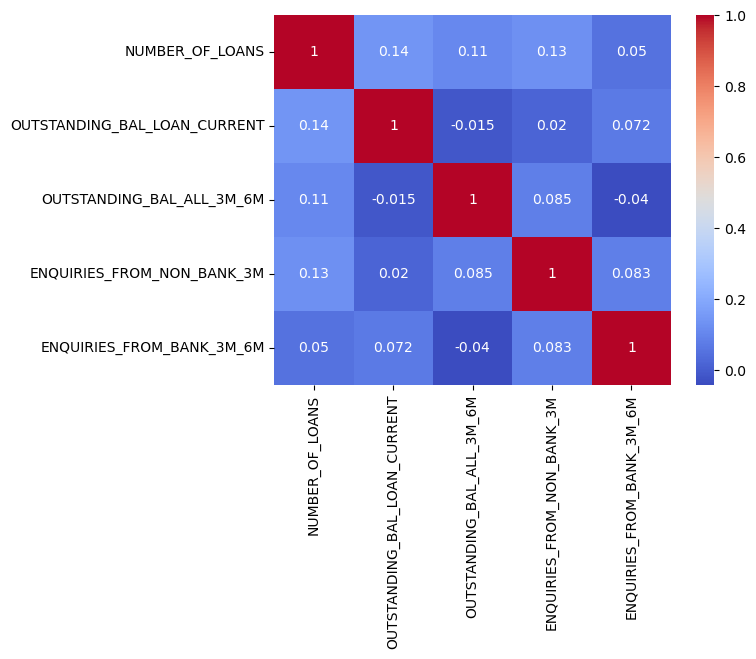

In [7]:
data =  data.drop(columns=['OUTSTANDING_BAL_ALL_3M','NUM_NEW_LOAN_TAKEN_BANK_12M','NUM_NEW_LOAN_TAKEN_12M','NUMBER_OF_RELATIONSHIP_BANK','OUTSTANDING_BAL_LOAN_6M'])
corr_data = data.drop(columns=['customer_id','label']).corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.show()

In [8]:
X = data.drop(columns=['customer_id','label'])
y = data['label']
X.head(10)

,NUMBER_OF_LOANS,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_ALL_3M_6M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FROM_BANK_3M_6M
0,1.00,"1,000,000.00","1,000,000.00",7.00,-3.00
1,10.00,"1,000,250.00","1,000,013.54",12.00,-3.00
2,13.00,"1,000,360.00","1,000,011.63",12.00,7.00
3,7.00,"1,000,040.00","1,000,009.83",7.00,4.22
4,8.42,"1,000,200.00","1,000,012.61",7.00,2.00
5,4.00,"1,000,100.00","1,000,016.92",7.00,-3.00
6,13.00,"1,001,670.00","1,000,007.74",7.00,3.11
7,19.00,"1,000,450.00","1,000,009.74",12.00,-3.00
8,7.00,"1,000,290.00","1,000,018.52",7.00,-3.00
9,10.00,"1,000,260.00","1,000,011.59",12.00,-3.00


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = AdaBoostClassifier(algorithm='SAMME')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

True positives: 418
False positives: 1
True negatives: 4910
False negatives: 671

Accuracy: 0.888
Precision: 0.9976133651551312
Recall: 0.3838383838383838


In [10]:
feature_importances = pd.DataFrame({
    'features': X_test.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index(drop=True)

print(feature_importances)

                       features  importance
0    ENQUIRIES_FROM_NON_BANK_3M        0.02
1     ENQUIRIES_FROM_BANK_3M_6M        0.04
2     OUTSTANDING_BAL_ALL_3M_6M        0.11
3               NUMBER_OF_LOANS        0.40
4  OUTSTANDING_BAL_LOAN_CURRENT        0.43


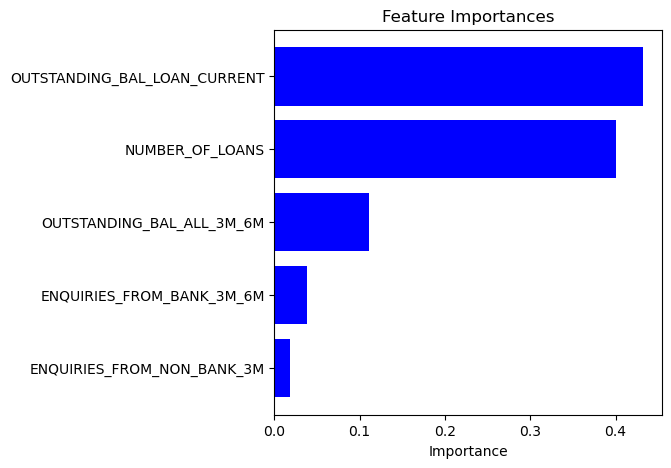

In [11]:
plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [12]:

data.drop(columns='customer_id', inplace=True)
data['label'] = data['label'].astype('category')
data

,label,NUMBER_OF_LOANS,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_ALL_3M_6M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FROM_BANK_3M_6M
0,1,1.00,"1,000,000.00","1,000,000.00",7.00,-3.00
1,0,10.00,"1,000,250.00","1,000,013.54",12.00,-3.00
2,0,13.00,"1,000,360.00","1,000,011.63",12.00,7.00
3,0,7.00,"1,000,040.00","1,000,009.83",7.00,4.22
4,1,8.42,"1,000,200.00","1,000,012.61",7.00,2.00
...,...,...,...,...,...,...
19995,0,4.00,"1,000,010.00","1,000,012.50",7.00,-3.00
19996,0,4.00,"1,000,020.00","1,000,011.67",7.00,2.00
19997,0,7.00,"1,000,080.00","1,000,009.39",12.00,4.22
19998,0,13.00,"1,000,410.00","1,000,010.88",17.00,4.50


C:\Users\Admin\AppData\Local\Temp\ipykernel_10108\3842825274.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = bins, kde = use_kde)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10108\3842825274.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = bins, kde = use_kde

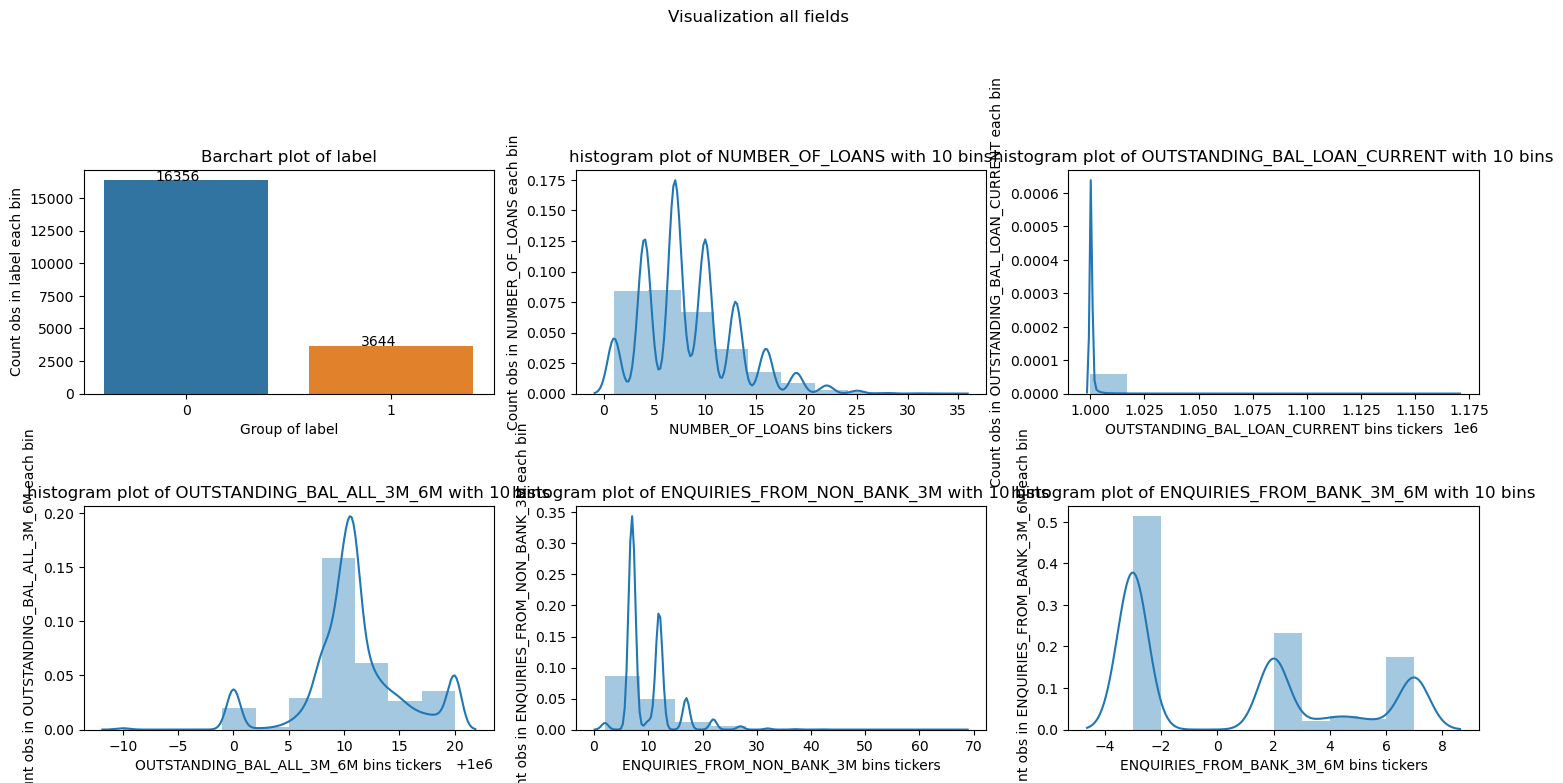

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


def _plot_hist_subplot(x, fieldname, bins = 10, use_kde = True):
  xlabel = '{} bins tickers'.format(fieldname)
  ylabel = 'Count obs in {} each bin'.format(fieldname)
  title = 'histogram plot of {} with {} bins'.format(fieldname, bins)
  ax = sns.distplot(x, bins = bins, kde = use_kde)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  return ax

def _plot_barchart_subplot(x, fieldname):
  xlabel = 'Group of {}'.format(fieldname)
  ylabel = 'Count obs in {} each bin'.format(fieldname)
  title = 'Barchart plot of {}'.format(fieldname)

  df_summary = x.value_counts(dropna = False)
  y_values = df_summary.values
  x_index = df_summary.index
  ax = sns.barplot(x = x_index, y = y_values, order = x_index)

  labels = list(set(x))
  for label, p in zip(y_values, ax.patches):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  return ax


fig = plt.figure(figsize=(18, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i, (fieldname, dtype) in enumerate(zip(data.columns, data.dtypes.values)):
  if i <= 11:
    ax_i = fig.add_subplot(4, 3, i+1)
    if dtype in ['float64', 'int64']:
      ax_i = _plot_hist_subplot(data[fieldname], fieldname=fieldname)
    else:
      ax_i = _plot_barchart_subplot(data[fieldname], fieldname=fieldname)
      
fig.suptitle('Visualization all fields')
plt.show()

In [14]:
columns_num = data.select_dtypes(['float', 'int']).columns
columns_obj = data.select_dtypes(['object']).columns

In [15]:
MAX_VAL = 999999999
MIN_VAL = -MAX_VAL

def _bin_table(data, colname, n_bins = 5, qcut = None):
  X = data[[colname, 'label']]
  X = X.sort_values(colname)
  coltype = X[colname].dtype

  if coltype in ['float', 'int']:
    if qcut is None:
      try:
        bins, thres = pd.qcut(X[colname], q = n_bins, retbins=True)
        # Thay thế threshold đầu và cuối của thres
        thres[0] = MIN_VAL
        thres[-1] = MAX_VAL
        bins, thres = pd.cut(X[colname], bins=thres, retbins=True)
        X['bins'] = bins
      except:
        print('n_bins must be lower to bin interval is valid!')
    else:
      bins, thres = pd.cut(X[colname], bins=qcut, retbins=True)
      X['bins'] = bins
  elif coltype == 'object':
    X['bins'] = X[colname]

  df_GB = pd.pivot_table(X, 
                index = ['bins'],
                values = ['label'],
                columns = ['label'],
                aggfunc = {
                    'label':np.size
                })

  df_Count = pd.pivot_table(X, 
                index = ['bins'],
                values = ['label'],
                aggfunc = {
                    'label': np.size
                })
  
  if coltype in ['float', 'int']:
    df_Thres = pd.DataFrame({'Thres':thres[1:]}, index=df_GB.index)
  elif coltype == 'object':
    df_Thres = pd.DataFrame(index=df_GB.index)
    thres = None
  df_Count.columns = ['No_Obs']
  df_GB.columns = ['#GOOD','#BAD']
  df_summary = df_Thres.join(df_Count).join(df_GB)
  return df_summary, thres

In [16]:
df_summary, thres = _bin_table(data, 'NUMBER_OF_LOANS', n_bins=5)
df_summary

,Thres,No_Obs,#GOOD,#BAD
bins,,,,
"(-999999999.0, 4.0]",4.00,5538,3344,2194
"(4.0, 7.0]",7.00,5589,4915,674
"(7.0, 10.0]",10.00,4411,3957,454
"(10.0, 13.0]",13.00,2421,2221,200
"(13.0, 999999999.0]","999,999,999.00",2041,1919,122


In [17]:
def _WOE(data, colname, n_bins = None, min_obs = 100, qcut = None):
  
  df_summary, thres = _bin_table(data, colname, n_bins = n_bins, qcut = qcut)
  
  df_summary['#BAD'] = df_summary['#BAD'].replace({0:1})
  
  if qcut is not None:
    
    exclude_ind = np.where(df_summary['No_Obs'] <= min_obs)[0]
    if exclude_ind.shape[0] > 0:
      new_thres = np.delete(thres, exclude_ind)
      print('Auto combine {} bins into {} bins'.format(n_bins, new_thres.shape[0]-1))
      
      df_summary, thres = _bin_table(data, colname, qcut=new_thres)
  
  new_thres = thres
  df_summary['GOOD/BAD'] = df_summary['#GOOD']/df_summary['#BAD']
  df_summary['%BAD'] = df_summary['#BAD']/df_summary['#BAD'].sum()
  df_summary['%GOOD'] = df_summary['#GOOD']/df_summary['#GOOD'].sum()
  df_summary['WOE'] = np.log(df_summary['%GOOD']/df_summary['%BAD'])
  df_summary['IV'] = (df_summary['%GOOD']-df_summary['%BAD'])*df_summary['WOE']
  df_summary['COLUMN'] = colname
  IV = df_summary['IV'].sum()
  print('Information Value of {} column: {}'.format(colname, IV))
  return df_summary, IV, new_thres

df_summary, IV, thres = _WOE(data, 'NUMBER_OF_LOANS', n_bins = 5, min_obs= 100)
df_summary

Information Value of NUMBER_OF_LOANS column: 0.741855431446809


,Thres,No_Obs,#GOOD,#BAD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 4.0]",4.00,5538,3344,2194,1.52,0.60,0.20,-1.08,0.43,NUMBER_OF_LOANS
"(4.0, 7.0]",7.00,5589,4915,674,7.29,0.18,0.30,0.49,0.06,NUMBER_OF_LOANS
"(7.0, 10.0]",10.00,4411,3957,454,8.72,0.12,0.24,0.66,0.08,NUMBER_OF_LOANS
"(10.0, 13.0]",13.00,2421,2221,200,11.11,0.05,0.14,0.91,0.07,NUMBER_OF_LOANS
"(13.0, 999999999.0]","999,999,999.00",2041,1919,122,15.73,0.03,0.12,1.25,0.11,NUMBER_OF_LOANS


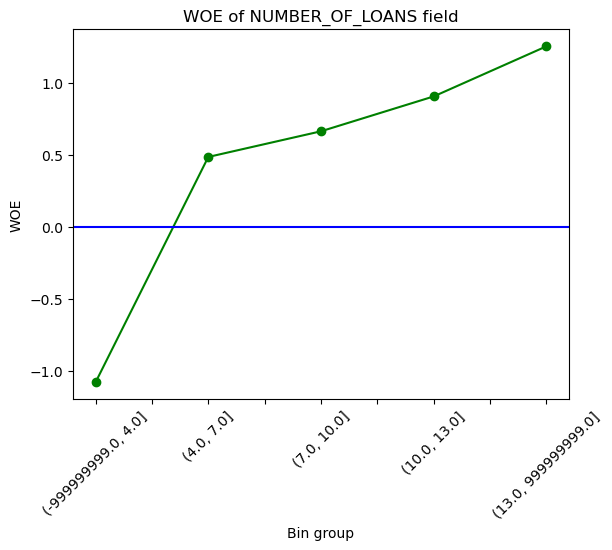

In [18]:
def _plot(df_summary):
  colname = list(df_summary['COLUMN'].unique())[0]
  df_summary['WOE'].plot(linestyle='-', marker='o',color='green')
  plt.title('WOE of {} field'.format(colname))
  plt.axhline(y=0, color = 'blue')
  plt.xticks(rotation=45)
  plt.ylabel('WOE')
  plt.xlabel('Bin group')
 
_plot(df_summary)

In [19]:
df_summary, IV, thres = _WOE(data, 'OUTSTANDING_BAL_LOAN_CURRENT', n_bins = 5, min_obs= 100)
df_summary

Information Value of OUTSTANDING_BAL_LOAN_CURRENT column: 0.667320752011253


,Thres,No_Obs,#GOOD,#BAD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 1000050.0]","1,000,050.00",4070,2250,1820,1.24,0.50,0.14,-1.29,0.47,OUTSTANDING_BAL_LOAN_CURRENT
"(1000050.0, 1000130.0]","1,000,130.00",4061,3567,494,7.22,0.14,0.22,0.48,0.04,OUTSTANDING_BAL_LOAN_CURRENT
"(1000130.0, 1000260.0]","1,000,260.00",3927,3466,461,7.52,0.13,0.21,0.52,0.04,OUTSTANDING_BAL_LOAN_CURRENT
"(1000260.0, 1000610.0]","1,000,610.00",3961,3498,463,7.56,0.13,0.21,0.52,0.05,OUTSTANDING_BAL_LOAN_CURRENT
"(1000610.0, 999999999.0]","999,999,999.00",3981,3575,406,8.81,0.11,0.22,0.67,0.07,OUTSTANDING_BAL_LOAN_CURRENT


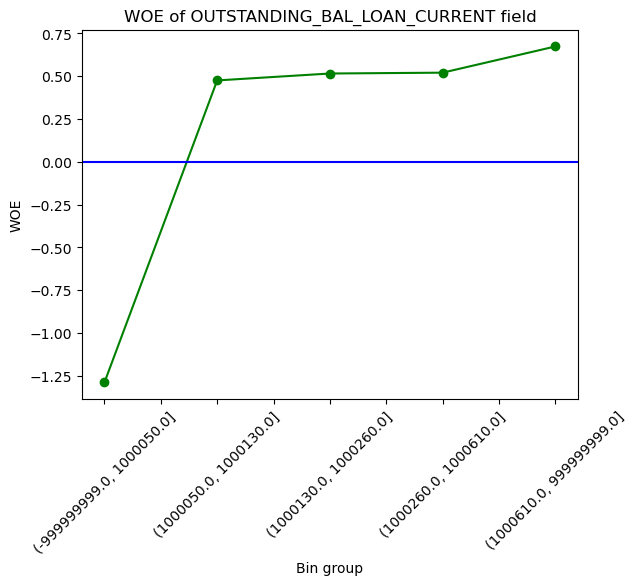

In [20]:
def _plot(df_summary):
  colname = list(df_summary['COLUMN'].unique())[0]
  df_summary['WOE'].plot(linestyle='-', marker='o',color='green')
  plt.title('WOE of {} field'.format(colname))
  plt.axhline(y=0, color = 'blue')
  plt.xticks(rotation=45)
  plt.ylabel('WOE')
  plt.xlabel('Bin group')
 
_plot(df_summary)

In [21]:
df_summary, IV, thres = _WOE(data, 'OUTSTANDING_BAL_ALL_3M_6M', n_bins = 5, min_obs= 100)
df_summary

Information Value of OUTSTANDING_BAL_ALL_3M_6M column: 0.2859275687171081


,Thres,No_Obs,#GOOD,#BAD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 1000008.521]","1,000,008.52",4001,2647,1354,1.95,0.37,0.16,-0.83,0.17,OUTSTANDING_BAL_ALL_3M_6M
"(1000008.521, 1000010.1]","1,000,010.10",4002,3526,476,7.41,0.13,0.22,0.50,0.04,OUTSTANDING_BAL_ALL_3M_6M
"(1000010.1, 1000010.877]","1,000,010.88",4323,3748,575,6.52,0.16,0.23,0.37,0.03,OUTSTANDING_BAL_ALL_3M_6M
"(1000010.877, 1000013.554]","1,000,013.55",3674,3238,436,7.43,0.12,0.20,0.50,0.04,OUTSTANDING_BAL_ALL_3M_6M
"(1000013.554, 999999999.0]","999,999,999.00",4000,3197,803,3.98,0.22,0.20,-0.12,0.00,OUTSTANDING_BAL_ALL_3M_6M


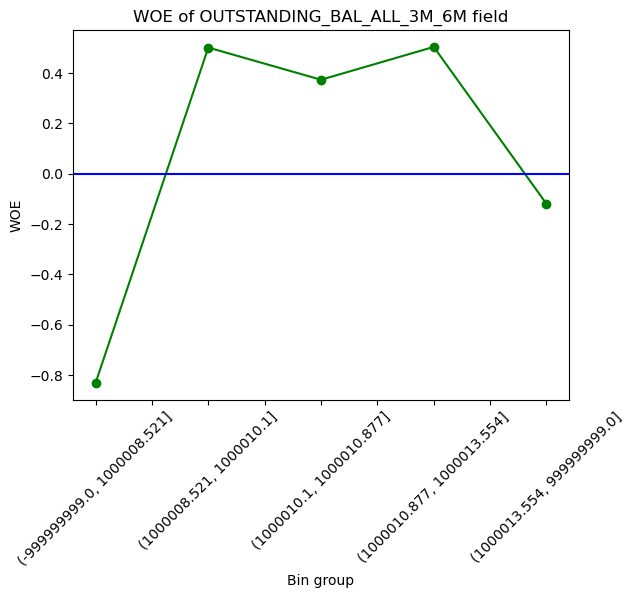

In [22]:
def _plot(df_summary):
  colname = list(df_summary['COLUMN'].unique())[0]
  df_summary['WOE'].plot(linestyle='-', marker='o',color='green')
  plt.title('WOE of {} field'.format(colname))
  plt.axhline(y=0, color = 'blue')
  plt.xticks(rotation=45)
  plt.ylabel('WOE')
  plt.xlabel('Bin group')

_plot(df_summary)

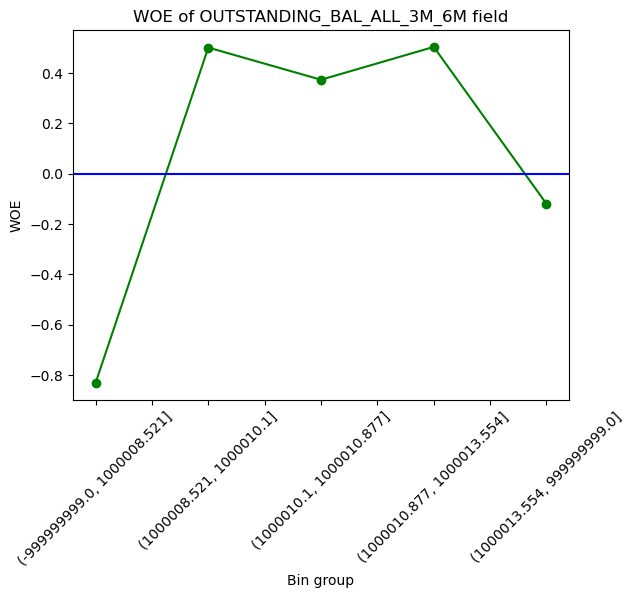

In [23]:
def _plot(df_summary):
  colname = list(df_summary['COLUMN'].unique())[0]
  df_summary['WOE'].plot(linestyle='-', marker='o',color='green')
  plt.title('WOE of {} field'.format(colname))
  plt.axhline(y=0, color = 'blue')
  plt.xticks(rotation=45)
  plt.ylabel('WOE')
  plt.xlabel('Bin group')

_plot(df_summary)

Nhìn vào biểu đồ, số lượng khoản nợ càng nhiều thì khả năng nợ xấu càng thấp vì:
- Khi có nhiều khoản nợ thì phải trả đúng hạn để không bị nợ xấu. khi có nhiều nợ xấu thì điểm tín dụng của ng vay sẽ bị giảm sẽ khiến việc vay nợ trong tương lai khó khăn hơn
- Nợ càng nhiều thì lãi phải trả càng cao, việc trả nợ k đúng hạn sẽ làm phát sinh thêm phí phạt làm tăng áp lực tài chính lên cho người vay
- Nếu khoản vay có tài sản đảm bảo, người vay có thể bị tịch thu nếu không trả nợ đúng hạn.

In [24]:
WOE_dict=dict()
nbins = {'NUMBER_OF_LOANS': 5, 'OUTSTANDING_BAL_LOAN_CURRENT': 5, 'OUTSTANDING_BAL_ALL_3M_6M': 5,
         'ENQUIRIES_FROM_NON_BANK_3M': 3, 'ENQUIRIES_FROM_BANK_3M_6M':3}
for (col, bins) in nbins.items():
  if col == 'ENQUIRIES_FROM_BANK_3M_6M':
    bins = [-np.inf, -3.0, 2.0, np.inf]

    df_summary, IV, thres = _WOE(
        data, 
        'ENQUIRIES_FROM_BANK_3M_6M', n_bins=3,   min_obs=100, qcut=bins    
    )
  # elif col == 'ENQUIRIES_FROM_NON_BANK_3M':
  #   bins = [2, 17, 37, np.inf]

  #   df_summary, IV, thres = _WOE(
  #       data, 
  #       'ENQUIRIES_FROM_NON_BANK_3M', n_bins=3,   min_obs=100, qcut=bins    
  #   )
  else:
    df_summary, IV, thres = _WOE(data, colname=col, n_bins=bins)
  WOE_dict[col] = {'table':df_summary, 'IV':IV}

Information Value of NUMBER_OF_LOANS column: 0.741855431446809
Information Value of OUTSTANDING_BAL_LOAN_CURRENT column: 0.667320752011253
Information Value of OUTSTANDING_BAL_ALL_3M_6M column: 0.2859275687171081
Information Value of ENQUIRIES_FROM_NON_BANK_3M column: 0.0077279057542444796
Information Value of ENQUIRIES_FROM_BANK_3M_6M column: 0.4871767381647646


In [25]:
columns = []
IVs = []
for col in data.columns:
  if col != 'label':
    columns.append(col)
    IVs.append(WOE_dict[col]['IV'])
df_WOE = pd.DataFrame({'column': columns, 'IV': IVs})

def _rank_IV(iv):
  if iv <= 0.02:
    return 'Useless'
  elif iv <= 0.1:
    return 'Weak'
  elif iv <= 0.3:
    return 'Medium'
  elif iv <= 0.5:
    return 'Strong'
  else:
    return 'Suspicious'

df_WOE['rank']=df_WOE['IV'].apply(lambda x: _rank_IV(x))
df_WOE.sort_values('IV', ascending=False)

,column,IV,rank
0,NUMBER_OF_LOANS,0.74,Suspicious
1,OUTSTANDING_BAL_LOAN_CURRENT,0.67,Suspicious
4,ENQUIRIES_FROM_BANK_3M_6M,0.49,Strong
2,OUTSTANDING_BAL_ALL_3M_6M,0.29,Medium
3,ENQUIRIES_FROM_NON_BANK_3M,0.01,Useless


In [26]:

# data.drop(columns='ENQUIRIES_FROM_NON_BANK_3M', axis=1, inplace=True)
# data

In [27]:
for col in WOE_dict.keys():
  try:
    key = list(WOE_dict[col]['table']['WOE'].index)
    woe = list(WOE_dict[col]['table']['WOE'])
    d = dict(zip(key, woe))
    col_woe = col+'_WOE'
    data[col_woe] = data[col].map(d)
  except:
    print(col)

In [28]:

X = data.filter(like='_WOE', axis = 1)
y = data['label']

In [29]:
X

,NUMBER_OF_LOANS_WOE,OUTSTANDING_BAL_LOAN_CURRENT_WOE,OUTSTANDING_BAL_ALL_3M_6M_WOE,ENQUIRIES_FROM_NON_BANK_3M_WOE,ENQUIRIES_FROM_BANK_3M_6M_WOE
0,-1.08,-1.29,-0.83,-0.05,0.60
1,0.66,0.52,0.50,0.13,0.60
2,0.91,0.52,0.50,0.13,0.24
3,0.49,-1.29,0.50,-0.05,0.24
4,0.66,0.52,0.50,-0.05,-1.03
...,...,...,...,...,...
19995,-1.08,-1.29,0.50,-0.05,0.60
19996,-1.08,-1.29,0.50,-0.05,-1.03
19997,0.49,0.48,0.50,0.13,0.24
19998,0.91,0.52,0.37,-0.09,0.24


In [30]:
from sklearn.model_selection import train_test_split

ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size = 0.2, stratify = y, shuffle = True, random_state = 123)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (16000, 5)
X_test shape:  (4000, 5)
y_train shape:  (16000,)
y_test shape:  (4000,)


In [31]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver = 'lbfgs', max_iter=1000, fit_intercept=True, tol=0.0001, C=1, penalty='l2')
logit_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [32]:
from sklearn.metrics import accuracy_score

y_pred_train = logit_model.predict(X_train)
acc_train = accuracy_score(y_pred_train, y_train)
y_pred_test = logit_model.predict(X_test)
acc_test = accuracy_score(y_pred_test, y_test)

print('accuracy on train: ', acc_train)
print('accuracy on test: ', acc_test)

accuracy on train:  0.8589375
accuracy on test:  0.85575


C:\Users\Admin\AppData\Local\Temp\ipykernel_10108\1988037723.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10108\1988037723.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


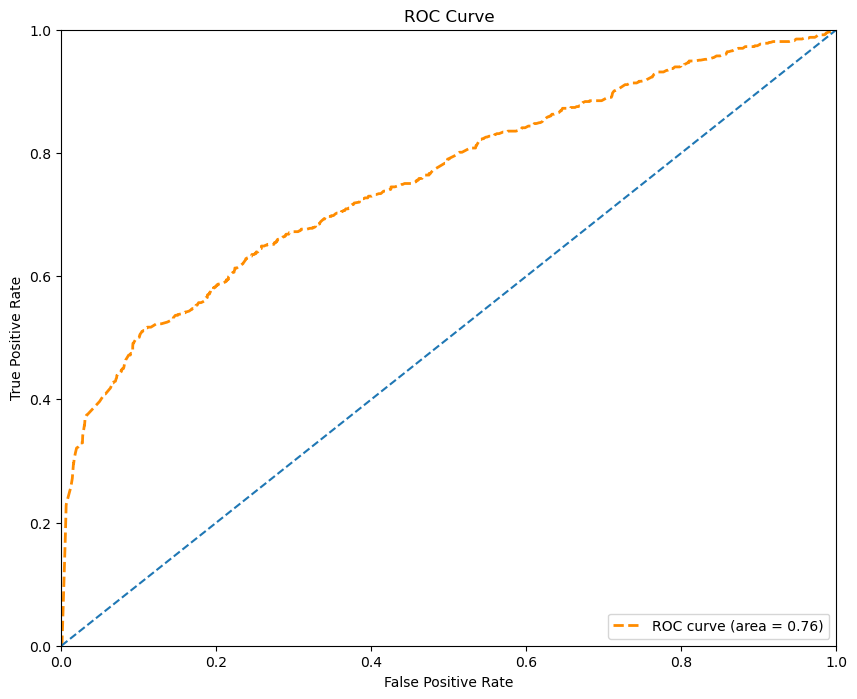

In [33]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = logit_model.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

In [34]:
gini = 2*roc_auc-1
print(gini)

0.5106457839793439


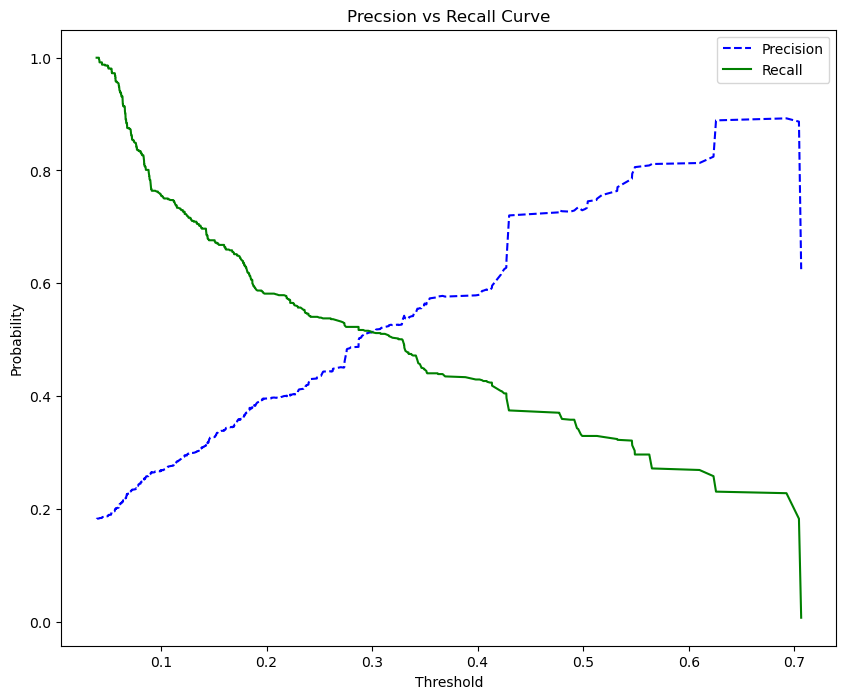

In [35]:
from sklearn.metrics import precision_recall_curve
precision, recall, thres = precision_recall_curve(y_test, y_pred_prob_test)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(precision, recall, thres)

In [36]:
def _KM(y_pred, n_bins):
  _, thresholds = pd.qcut(y_pred, q=n_bins, retbins=True)
  cmd_BAD = []
  cmd_GOOD = []
  BAD_id = set(np.where(y_test == 0)[0])
  GOOD_id = set(np.where(y_test == 1)[0])
  total_BAD = len(BAD_id)
  total_GOOD = len(GOOD_id)
  for thres in thresholds:
    pred_id = set(np.where(y_pred <= thres)[0])
    # Đếm % số lượng hồ sơ BAD có xác suất dự báo nhỏ hơn hoặc bằng thres
    per_BAD = len(pred_id.intersection(BAD_id))/total_BAD
    cmd_BAD.append(per_BAD)
    # Đếm % số lượng hồ sơ GOOD có xác suất dự báo nhỏ hơn hoặc bằng thres
    per_GOOD = len(pred_id.intersection(GOOD_id))/total_GOOD
    cmd_GOOD.append(per_GOOD)
  cmd_BAD = np.array(cmd_BAD)
  cmd_GOOD = np.array(cmd_GOOD)
  return cmd_BAD, cmd_GOOD, thresholds

cmd_BAD, cmd_GOOD, thresholds = _KM(y_pred_prob_test, n_bins=20)

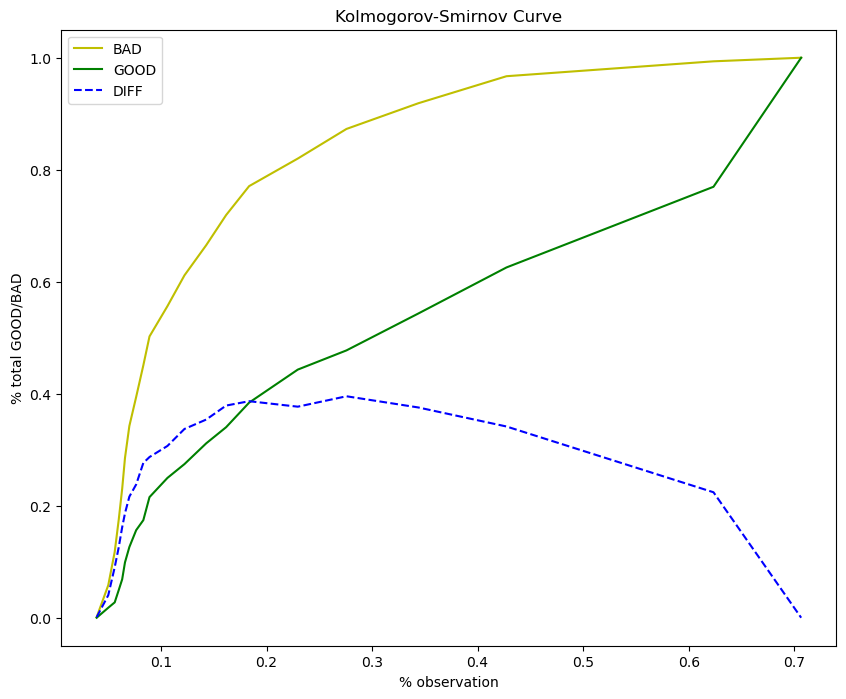

In [37]:
def _plot_KM(cmd_BAD, cmd_GOOD, thresholds):
  plt.figure(figsize = (10, 8))
  plt.plot(thresholds, cmd_BAD, 'y-', label = 'BAD')
  plt.plot(thresholds, cmd_GOOD, 'g-', label = 'GOOD')
  plt.plot(thresholds, cmd_BAD-cmd_GOOD, 'b--', label = 'DIFF')
  plt.xlabel('% observation')
  plt.ylabel('% total GOOD/BAD')
  plt.title('Kolmogorov-Smirnov Curve')
  plt.legend()

_plot_KM(cmd_BAD, cmd_GOOD, thresholds)

In [38]:
from scipy import stats

stats.ks_2samp(cmd_BAD, cmd_GOOD)

KstestResult(statistic=0.38095238095238093, pvalue=0.09481656218610322, statistic_location=0.3840877914951989, statistic_sign=-1)

In [39]:
import numpy as np

def _CreditScore(beta, alpha, woe, n = 12, odds = 1/4, pdo = -50, thres_score = 600):
  factor = pdo/np.log(2)
  offset = thres_score - factor*np.log(odds)
  score = (beta*woe+alpha/n)*factor+offset/n
  return score

_CreditScore(beta = 0.5, alpha = -1, woe = 0.15, n = 12)

42.2677896003704

In [40]:
betas_dict = dict(zip(list(X_train.columns), logit_model.coef_[0]))
alpha = logit_model.intercept_[0]
betas_dict

{'NUMBER_OF_LOANS_WOE': -0.5499327394773875,
 'OUTSTANDING_BAL_LOAN_CURRENT_WOE': -0.45192500384640727,
 'OUTSTANDING_BAL_ALL_3M_6M_WOE': -0.5118814263625694,
 'ENQUIRIES_FROM_NON_BANK_3M_WOE': -0.30653404996610917,
 'ENQUIRIES_FROM_BANK_3M_6M_WOE': -0.7103723973999778}

In [41]:
cols = []
features = []
woes = []
betas = []
scores = []

for col in columns:
  for feature, woe in WOE_dict[col]['table']['WOE'].to_frame().iterrows():
      cols.append(col)
      
      feature = str(feature)
      features.append(feature)    
      
      woe = woe.values[0]
      woes.append(woe)
      
      col_woe = col+'_WOE'
      beta = betas_dict[col_woe]
      betas.append(beta)
      
      score = _CreditScore(beta = beta, alpha = alpha, woe = woe, n = 12)
      scores.append(score)

df_WOE = pd.DataFrame({'Columns': cols, 'Features': features, 'WOE': woes, 'Betas':betas, 'Scores':scores})
df_WOE.head()

,Columns,Features,WOE,Betas,Scores
0,NUMBER_OF_LOANS,"(-999999999.0, 4.0]",-1.08,-0.55,7.73
1,NUMBER_OF_LOANS,"(4.0, 7.0]",0.49,-0.55,69.82
2,NUMBER_OF_LOANS,"(7.0, 10.0]",0.66,-0.55,76.90
3,NUMBER_OF_LOANS,"(10.0, 13.0]",0.91,-0.55,86.51
4,NUMBER_OF_LOANS,"(13.0, 999999999.0]",1.25,-0.55,100.32


In [42]:
test_obs = data[columns].iloc[0:1, :]
test_obs

,NUMBER_OF_LOANS,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_ALL_3M_6M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FROM_BANK_3M_6M
0,1.00,"1,000,000.00","1,000,000.00",7.00,-3.00


In [43]:
def _search_score(obs, col):
  feature = [str(inter) for inter in list(WOE_dict[col]['table'].index) if obs[col].values[0] in inter][0]
  score = df_WOE[(df_WOE['Columns'] == col) & (df_WOE['Features'] == feature)]['Scores'].values[0]
  return score

score = _search_score(test_obs, 'NUMBER_OF_LOANS')
score

7.727492012377027

In [44]:
def _total_score(obs, columns = columns):
  scores = dict()
  for col in columns:
    scores[col] = _search_score(obs, col)
  total_score = sum(scores.values())
  return scores, total_score

scores, total_score = _total_score(test_obs)

In [45]:
total_scores = []
data_test = data.iloc[id_test].copy()
for i in np.arange(data_test[columns].shape[0]):
  obs = data_test[columns].iloc[i:(i+1), :]
  _, score = _total_score(obs)
  total_scores.append(score)

data_test['Score'] = total_scores

C:\Users\Admin\AppData\Local\Temp\ipykernel_10108\1827617871.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test['Score'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_10108\1827617871.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test[data_test['label']==1]['Score'], label='

Text(0.5, 1.0, 'Distribution Score in Default vs Non-Default')

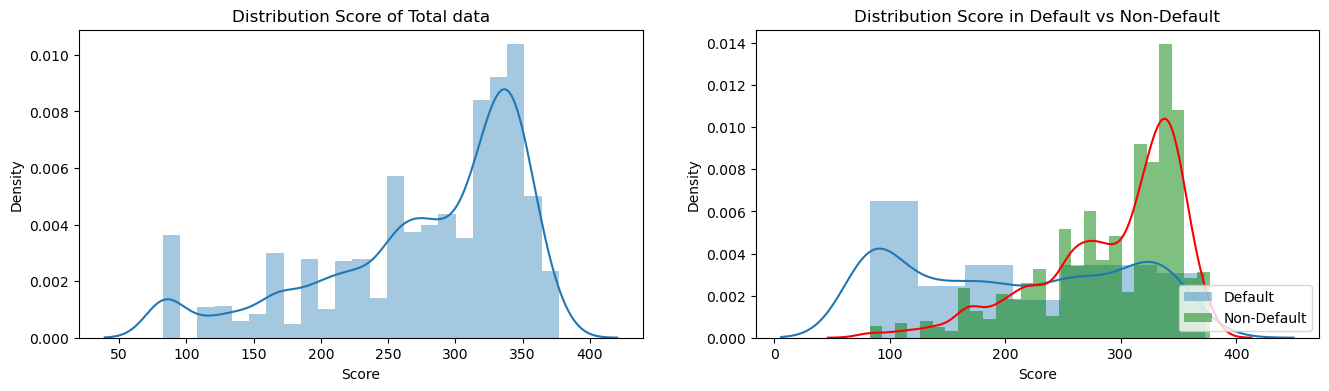

In [46]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.distplot(data_test['Score'])
plt.title('Distribution Score of Total data')
plt.subplot(122)
sns.distplot(data_test[data_test['label']==1]['Score'], label='Default')
sns.distplot(data_test[data_test['label']==0]['Score'], label='Non-Default', 
             kde_kws={"color": "r"}, 
             hist_kws={"color": "g", "alpha":0.5})
plt.legend(loc = 'lower right')
plt.title('Distribution Score in Default vs Non-Default')

**Phân nhóm dữ liệu của các features để tạo các mốc điểm**

Dùng KBinsDiscretizer để chia các biến liên tục thành các nhóm

In [47]:
# binning = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# X_binned = binning.fit_transform(X)
# X_binned_df = pd.DataFrame(X_binned, columns=['NUMBER_OF_LOANS', 
#                                               'OUTSTANDING_BAL_LOAN_CURRENT', 
#                                               'OUTSTANDING_BAL_ALL_3M_6M', 
#                                               'ENQUIRIES_FROM_NON_BANK_3M', 
#                                               'ENQUIRIES_FROM_BANK_3M_6M'])
# # binning = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# # data['LOAN_CURRENT_BIN'] = binning.fit_transform(data[['OUTSTANDING_BAL_LOAN_CURRENT']]).astype(int)

# credit_data_binned = pd.concat([X_binned_df, data['label']], axis=1)

# # Tính WOE cho từng biến đã binned
# for column in X_binned_df.columns:
#     # Phân nhóm (bins) và đếm số lượng khách hàng tốt và xấu trong mỗi bin
#     total_good = credit_data_binned[credit_data_binned['label'] == 0].groupby(column).size()
#     total_bad = credit_data_binned[credit_data_binned['label'] == 1].groupby(column).size()

#     # Tính tỷ lệ khách hàng tốt và xấu
#     good_pct = total_good / total_good.sum()
#     bad_pct = total_bad / total_bad.sum()

#     # Tính WOE cho mỗi bin
#     woe = np.log(good_pct / bad_pct)
#     print(f"WOE for {column}:")
#     print(woe)

**Tính toán WOE (Weight of Evidence)**